### Nome: João Marcos Alves Modesto Ramos
### Matricula: 3506

In [2]:
import pandas as pd

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,roc_curve,accuracy_score,recall_score,f1_score,average_precision_score

from sklearn.metrics import auc,precision_recall_fscore_support,precision_recall_curve
from sklearn.metrics import RocCurveDisplay


In [14]:
df = pd.read_csv("breastcancerwisconsin.csv")
df = df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [57]:
def converteDiagnostico(x):
    if x =='M':
        return 1
    else:
        return 0
df['diagnosis'] = df['diagnosis'].apply(converteDiagnostico)

### Aplicando algoritmos 

In [26]:
def classificacao(df, model, target):
    
    print("\n--- CLASSIFICAÇÃO - ALGORITMO ---")
    X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=[target]), df[target], test_size=0.20, random_state=None, 
                                                        shuffle=False)

    tempo_exec_inicial = time.time()

    #model = DecisionTreeClassifier(random_state=0)    
    model.fit(X_train, Y_train)
    print("\n\nAccuracy = %.2f" % (100 * np.sum(model.predict(X_test) == Y_test)/len(Y_test)))

    scores_mlp = cross_val_score(model, df.drop(columns=[target]), df[target], cv=10)
    print("\n\nAccuracy (Validação cruzada) = %.2f (+/- %.2f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

    print("\n\n(precision, recall, fscore)\n")
    print(classification_report(Y_test, model.predict(X_test)))

    tempo_exec_final = time.time()

    print("\n\nTempo de execução: %.4f s" % (tempo_exec_final - tempo_exec_inicial))

    print("\n\nMatriz de confusão\n")
    print(confusion_matrix(Y_test, model.predict(X_test)))

    print("\n\nPlot da matriz de confusão:\n")
    plot_confusion_matrix(model, X_test, Y_test, values_format='d')
    plt.show()
    


--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy = 93.86


Accuracy (Validação cruzada) = 0.95 (+/- 0.04)


(precision, recall, fscore)

              precision    recall  f1-score   support

           B       0.99      0.93      0.96        88
           M       0.81      0.96      0.88        26

    accuracy                           0.94       114
   macro avg       0.90      0.95      0.92       114
weighted avg       0.95      0.94      0.94       114



Tempo de execução: 14.3872 s


Matriz de confusão

[[82  6]
 [ 1 25]]


Plot da matriz de confusão:



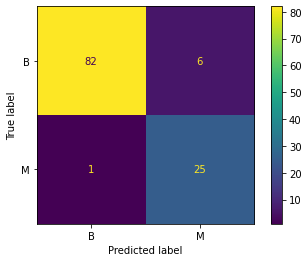

In [51]:
from sklearn import svm

modelo = svm.SVC(kernel='linear')
classificacao(df,modelo,'diagnosis')


--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy = 92.98


Accuracy (Validação cruzada) = 0.94 (+/- 0.03)


(precision, recall, fscore)

              precision    recall  f1-score   support

           B       0.99      0.92      0.95        88
           M       0.78      0.96      0.86        26

    accuracy                           0.93       114
   macro avg       0.88      0.94      0.91       114
weighted avg       0.94      0.93      0.93       114



Tempo de execução: 0.4541 s


Matriz de confusão

[[81  7]
 [ 1 25]]


Plot da matriz de confusão:



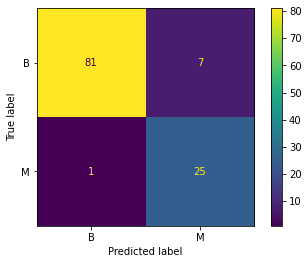

In [33]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
classificacao(df,modelo,'diagnosis')


### Comparação com diversos modelos

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB


In [50]:
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['diagnosis']), df['diagnosis'], test_size=0.20, random_state=None, 
                                                        shuffle=False)
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train,Y_train)
    prediction=model.predict(X_test)
    accuracy.append(accuracy_score(prediction,Y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,0
Linear Svm,0.938596
Radial Svm,0.947368
Logistic Regression,0.929825
KNN,0.929825
Decision Tree,0.859649
Random forest,0.973684
Naive Bayes,0.956140


## Plotando a curva ROC

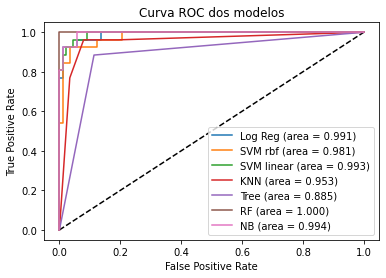

In [63]:
def plotarCurvaROC(df,target):
    ## Função retirada de: https://www.kaggle.com/mnpathak1/model-comparison-with-roc-curves-and-more
    
    train_X, test_X, train_Y, test_Y = train_test_split(df.drop(columns=[target]), df[target], test_size=0.20, random_state=None, 
                                                        shuffle=False)
    ##Abaixo vamos executar cada modelo:
    # Logistic regression
    modelLR = LogisticRegression()
    modelLR.fit(train_X,train_Y)
    y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
    fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

    # SVM with rbf
    modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
    modelSVMrbf.fit(train_X,train_Y)
    y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
    fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
    roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
    precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)

    # SVM with linear
    modelSVMlinear=svm.SVC(kernel='linear', probability=True)
    modelSVMlinear.fit(train_X,train_Y)
    y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
    fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
    roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
    precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)

    # KNN
    modelKNN = KNeighborsClassifier(n_neighbors=3)
    modelKNN.fit(train_X,train_Y)
    y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
    fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
    roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
    precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)


    # Decision Tree
    modelTree=DecisionTreeClassifier()
    modelTree.fit(train_X,train_Y)
    y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
    fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
    roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
    precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

    # Random forest
    modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
    modelRF.fit(train_X,train_Y)
    y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)


    # Naive Bayes
    modelNB= GaussianNB()
    modelNB.fit(train_X,train_Y)
    y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
    fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
    plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
    plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
    plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
    plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
    plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
    plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC dos modelos')
    plt.legend(loc='best')
    plt.show()
plotarCurvaROC(df,'diagnosis')

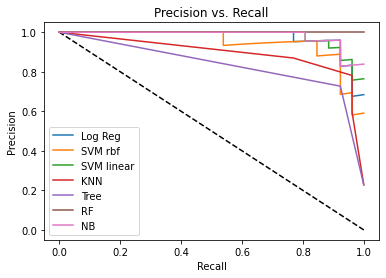

In [62]:
def precisaoVsRecall(df,target):
    ## Função retirada de: https://www.kaggle.com/mnpathak1/model-comparison-with-roc-curves-and-more
    
    train_X, test_X, train_Y, test_Y = train_test_split(df.drop(columns=[target]), df[target], test_size=0.20, random_state=None, 
                                                        shuffle=False)
    ##Abaixo vamos executar cada modelo:
    # Logistic regression
    modelLR = LogisticRegression()
    modelLR.fit(train_X,train_Y)
    y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
    fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

    # SVM with rbf
    modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
    modelSVMrbf.fit(train_X,train_Y)
    y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
    fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
    roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
    precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)

    # SVM with linear
    modelSVMlinear=svm.SVC(kernel='linear', probability=True)
    modelSVMlinear.fit(train_X,train_Y)
    y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
    fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
    roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
    precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)

    # KNN
    modelKNN = KNeighborsClassifier(n_neighbors=3)
    modelKNN.fit(train_X,train_Y)
    y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
    fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
    roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
    precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)


    # Decision Tree
    modelTree=DecisionTreeClassifier()
    modelTree.fit(train_X,train_Y)
    y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
    fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
    roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
    precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

    # Random forest
    modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
    modelRF.fit(train_X,train_Y)
    y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)


    # Naive Bayes
    modelNB= GaussianNB()
    modelNB.fit(train_X,train_Y)
    y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
    fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)
    
    plt.plot([1, 0], [0, 1], 'k--')
    plt.plot(recall_lr, precision_lr, label='Log Reg')
    plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
    plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
    plt.plot(recall_KNN, precision_KNN, label='KNN')
    plt.plot(recall_Tree, precision_Tree, label='Tree')
    plt.plot(recall_rf, precision_rf, label='RF')
    plt.plot(recall_nb, precision_nb, label='NB')
    plt.title('Precision vs. Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.show()
precisaoVsRecall(df,'diagnosis')